In [1]:
import sys 
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017/fits_functions')
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017')

#import importlib.util
#spec = importlib.util.spec_from_file_location("spec_calcs", "/home/kelcey/hera/Washington/uwchamp2017/clusterer.py")

#spec_calcs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(spec_calcs)

import clusterer as clst
import fits_functions as ff

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from astropy import units as u
import glob
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import *
from astropy.table import Table
from astropy.coordinates import match_coordinates_sky

This is a quick walkthrough of how to view the contours of an extended object (EO) from FHD data
on top of images of the same object from TGSS or NVSS. We start with an IDL .sav
file like this: 

'new_source_arrays/1130788624_source_array.sav'

This can be opened using clst.collector; see its documentation for information about this function.

In [4]:
data = clst.collector('/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav')

# downloadTGSS

From here, data can be put into these functions to be plotted. We still need the
images from TGSS or NVSS to compare it with. To do this, we plug data and the
object ID into the function downloadTGSS. We will use EO ID 32770 for this example.

In [5]:
data

{'data': [{'source_array': rec.array([(32769, 1230.3986 , 1071.8334 , 50.40629 , -37.14988 , 1.0313290e+04, 182.43523, -0.79999924, 1., 0, rec.array([(32769, 1229.1859, 1071.7485, 50.32079 , -37.162556, 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.23282537, 0.25499895, 0.00647642+0.j, 0.00647678+0.j, 1.4703797, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.1833, 1071.7672, 50.320404, -37.16155 , 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.21357521, 0.2339155, 0.00594095+0.j, 0.00594128+0.j, 1.3488078, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.8564, 1070.7148, 50.37978 , -37.21474 , 0., 182.43

In [5]:
fitsTGSS = ff.downloadTGSS(data,32770)

print fitsTGSS

EOID32770_RA50.9784660339_DEC-37.2810325623_TGSS.fits


# contourFits

We are now ready to plot the ocntours of our EO on top of the TGSS
image of it! All you need to do is run contourFits, like this:

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]
32770_contours_TGSS.png


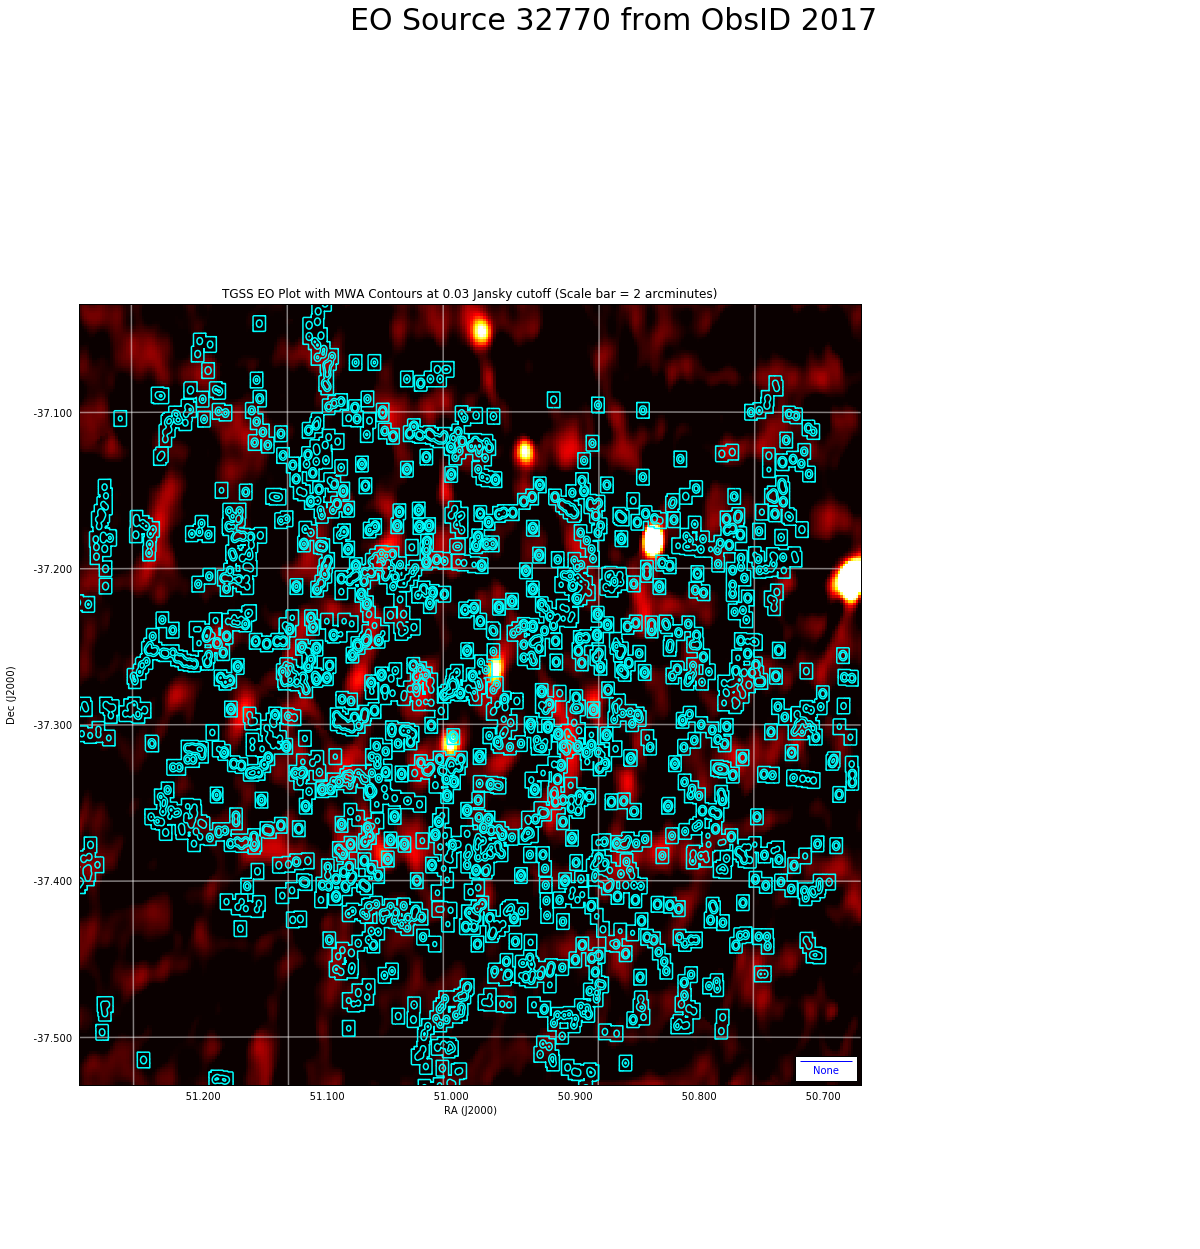

In [6]:
contourFileTGSS = ff.contourFits(data,fitsTGSS,32770,'32770_contours_TGSS.png')

print contourFileTGSS

Congratulations! You now have a .png file of this image. 

Now, lets check this object against NVSS. To do this, simply run downloadTGSS
as you did before, but include the argument NVSS=True, to get the FITS image 
file. From there, run contourFile with this FITS file.



EOID32770_RA50.9784660339_DEC-37.2810325623_NVSS.fits
INFO: Auto-setting vmax to  2.379e-02 [aplpy.core]



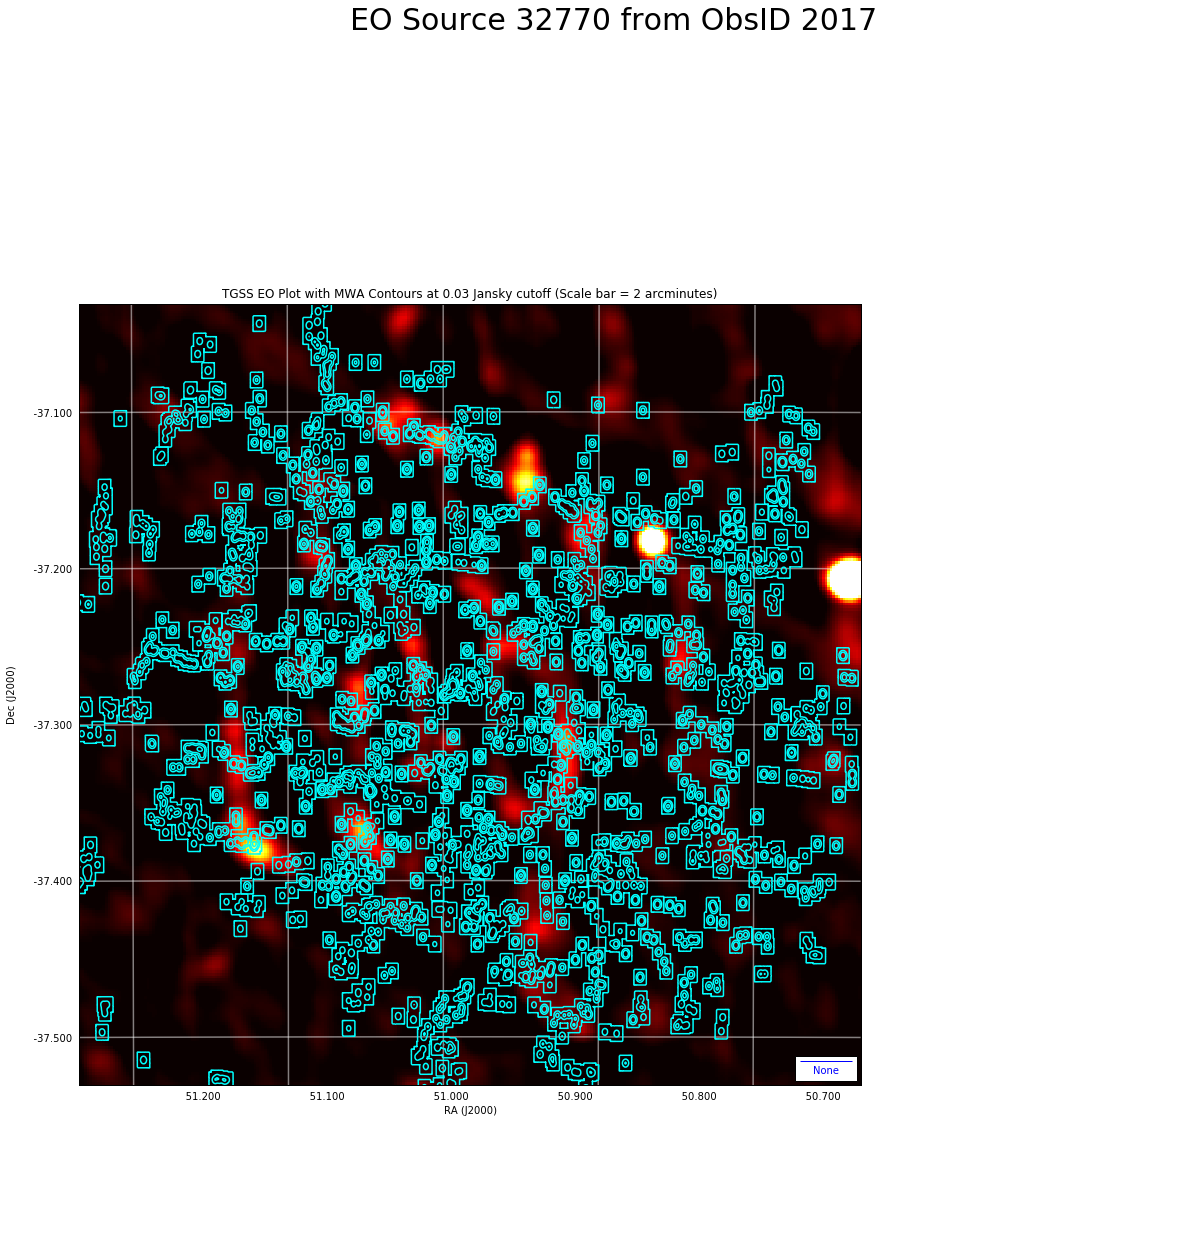

In [7]:
fitsNVSS = ff.downloadTGSS(data,32770,NVSS=True,)
print fitsNVSS

contourFileNVSS = ff.contourFits(data,fitsNVSS,32770,'32770_contours_NVSS.png')
print 

If you want to see the plots when clustering has been applied to the file,
then include the argument cluster=True. The default flux cutoff for this is 
0.03 janskies, but if you would like to change this value (to 0.02 janskies,
for example), then include the argument cutoff=0.02.

In [16]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=True,cutoff=0.02)

AttributeError: 'module' object has no attribute 'modeler'

# getFits

Last function! If you want to make a binary FITS file out of data that has had some clustering
done to it, use getFits. First, make a list of all of the EOids of the EO's that you would like 
clustered:

In [13]:
EOlist = [32770,32772,32808]

Now plug this in to the argument EOidList

In [18]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')

AttributeError: 'module' object has no attribute 'modeler'

# Start of Kelcey's Work

INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]


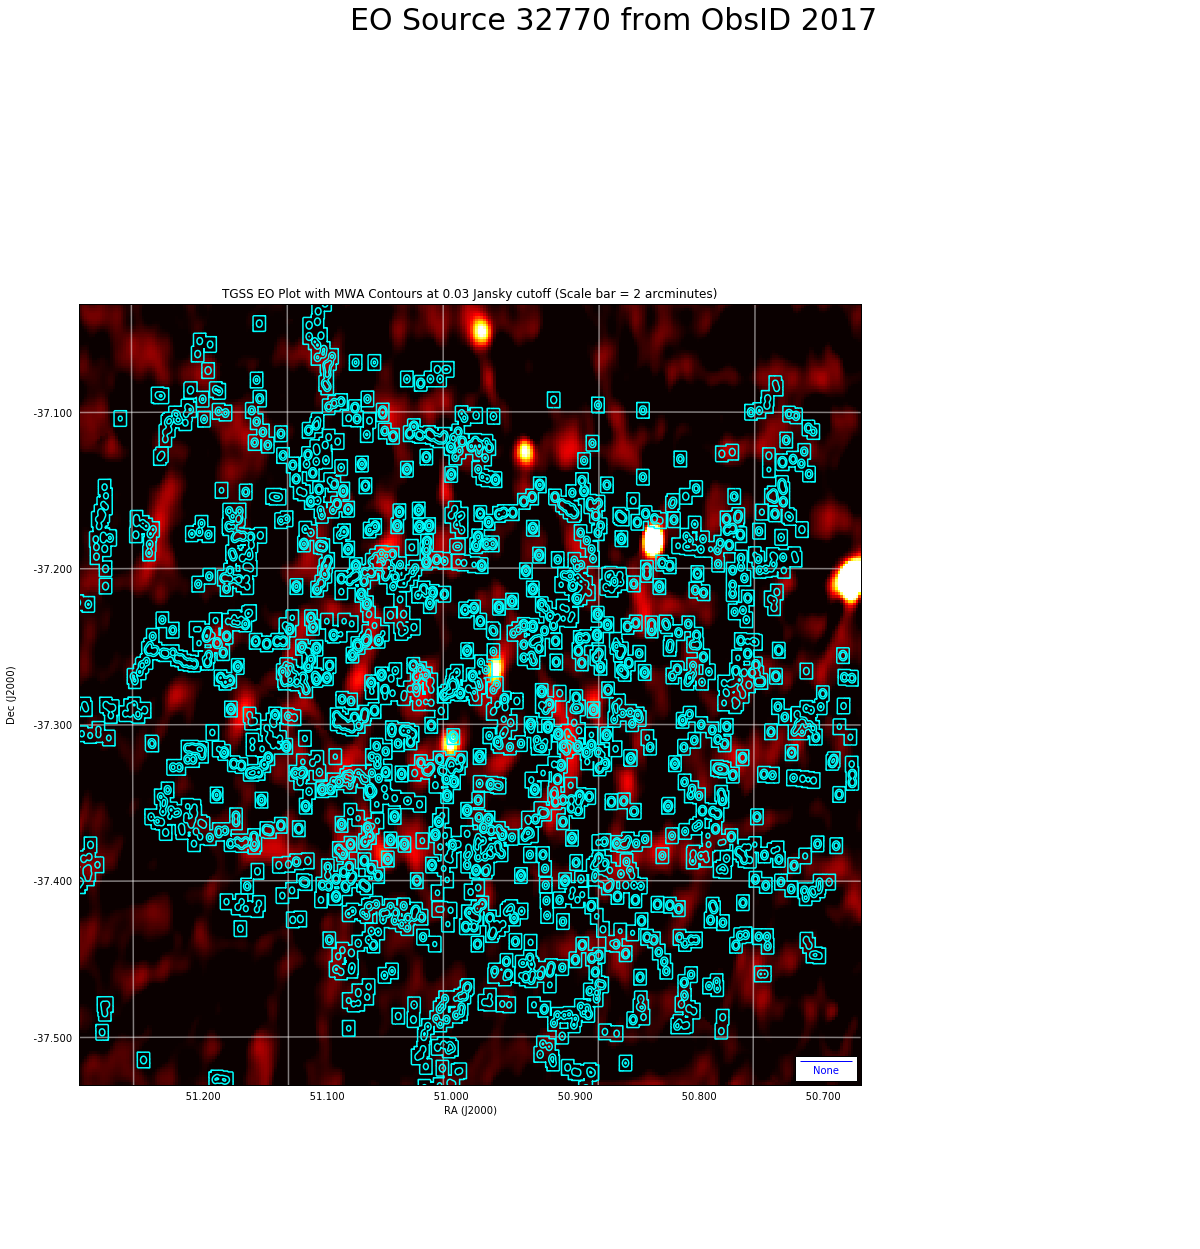

In [14]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=False,cutoff=0.02)
#This code would not run because it called a function 'modeler' that does not exist. Setting cluster to False 
#is the only way to get ff.contourFits to run.

In [20]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')
#Since clst.modler is necessary for this function to run, it will not run unless we find out where
#to find clst.modler

AttributeError: 'module' object has no attribute 'modeler'

In [3]:
path = '/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav'
sep = clst.separator(data)
#This function seperates the data into point sources and extended sources

NameError: name 'data' is not defined

In [7]:
points = sep['psources']
exts = sep['extsources']
#Defining two lists for the point sources and extended sources

In [10]:
points_seek = clst.seeker(points)
#Can't use this function on data that has already been separated

TypeError: list indices must be integers, not str

### Using clst.seeker
This is a very useful function in analyzing .sav files. Arrays begining with 'point' represent the higher level sources while 'EO' arrays are lower level sources, containing information about the smaller pieces that that make up the highere level points

In [8]:
data_seek = clst.seeker(data)

In [9]:
data_seek.keys()

['point_sources_DEC',
 'all_YY',
 'point_sources_YX',
 'EO_sources_Q',
 'point_sources_ID',
 'EO_sources_I',
 'point_sources_STON',
 'all_DEC',
 'EO_sources_DEC',
 'EO_sources_FREQ',
 'EO_sources_YX',
 'EO_sources_YY',
 'all_BEAM',
 'all_I',
 'point_sources_RA',
 'all_XX',
 'EO_sources_ALPHA',
 'point_sources_V',
 'point_sources_U',
 'EO_sources_FLAG',
 'EO_sources_XX',
 'EO_sources_X',
 'point_sources_Q',
 'point_sources_ALPHA',
 'point_sources_XX',
 'point_sources_XY',
 'point_sources_YY',
 'point_sources_GAIN',
 'EO_sources_RA',
 'point_sources_Y',
 'point_sources_X',
 'EO_sources_V',
 'point_sources_FREQ',
 'all_RA',
 'EO_sources_Y',
 'EO_sources_ID',
 'EO_sources_GAIN',
 'EO_sources_U',
 'point_sources_FLAG',
 'EO_sources_XY',
 'point_sources_I',
 'EO_sources_STON']

### Brights
The clst.chaser function identifies the brightest source in a given data set and returns useful information about it.

In [10]:
brights = clst.chaser(data_seek['EO_sources_ID'], data_seek['EO_sources_X'], data_seek['EO_sources_Y'],
           data_seek['EO_sources_RA'], data_seek['EO_sources_DEC'], data_seek['EO_sources_STON'], 
           data_seek['EO_sources_FREQ'], data_seek['EO_sources_ALPHA'], data_seek['EO_sources_GAIN'],
           data_seek['EO_sources_FLAG'], data_seek['EO_sources_XX'], data_seek['EO_sources_YY'],
           data_seek['EO_sources_XY'], data_seek['EO_sources_YX'], data_seek['EO_sources_I'],
           data_seek['EO_sources_Q'], data_seek['EO_sources_U'], data_seek['EO_sources_V'], 
                      radius = 1)

In [11]:
brights
#This represents the brightest source within a set of data.

{'brightest_ALPHA': [-0.8],
 'brightest_DEC': [-37.162556],
 'brightest_FLAG': [0],
 'brightest_FREQ': [182.43501],
 'brightest_GAIN': [0.1],
 'brightest_I': [1.4703797],
 'brightest_ID': [32769],
 'brightest_Q': [0.0],
 'brightest_RA': [50.32079],
 'brightest_STON': [0.0],
 'brightest_U': [0.0],
 'brightest_V': [0.0],
 'brightest_X': [1229.1859],
 'brightest_XX': [0.23282537],
 'brightest_XY': [(0.006476422+0j)],
 'brightest_Y': [1071.7485],
 'brightest_YX': [(0.0064767767+0j)],
 'brightest_YY': [0.25499895],
 'brightest_indices': [0]}

Adding some stuff to make the plots nicer

In [4]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}

Below is a plot of one of the sets of points that make up a higher level point source. The first plot shows I-band magnitudes with color while the second illustrates them with size.

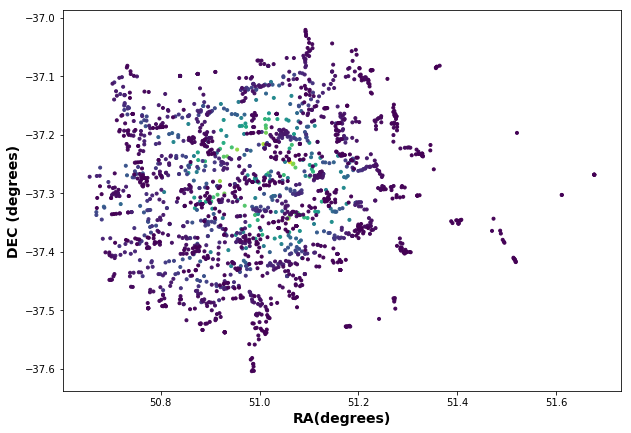

In [16]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
ID = np.array(data_seek['point_sources_ID'])
plt.scatter(RA[:, 1][0], DEC[:, 1][0], c = I[:, 1][0], marker = '.' )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)');

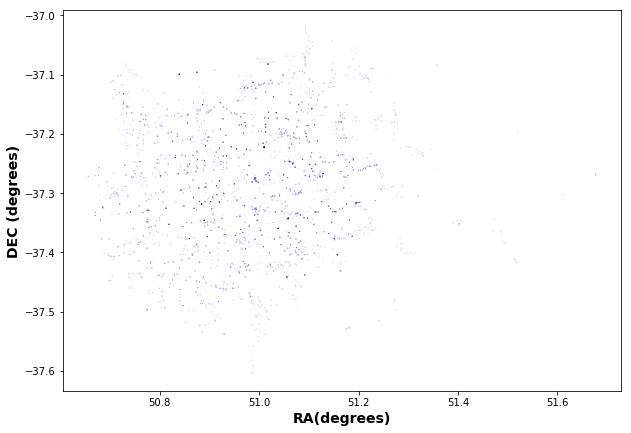

In [17]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
plt.scatter(RA[:, 1][0], DEC[:, 1][0], s = I[:, 1][0], marker = '.', color = 'b' )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)');

Below are two plots of one set of data. One shows the I-band magnitudes with color and the other shows them with size. It is difficult to distinguish much about the first plot. The second plot is nice but could be better if we could see individual sources.

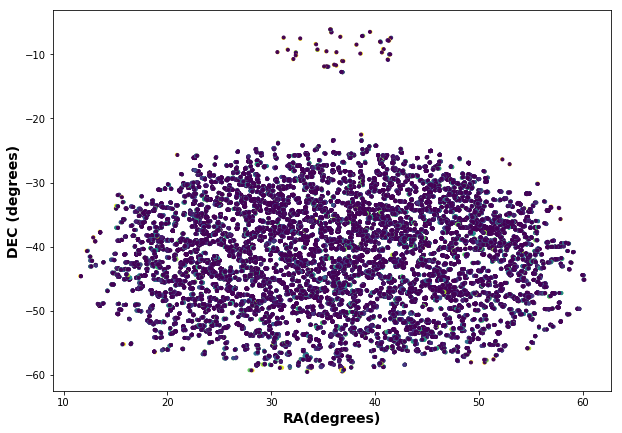

In [18]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], c = I[:, i][0], marker = '.')
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

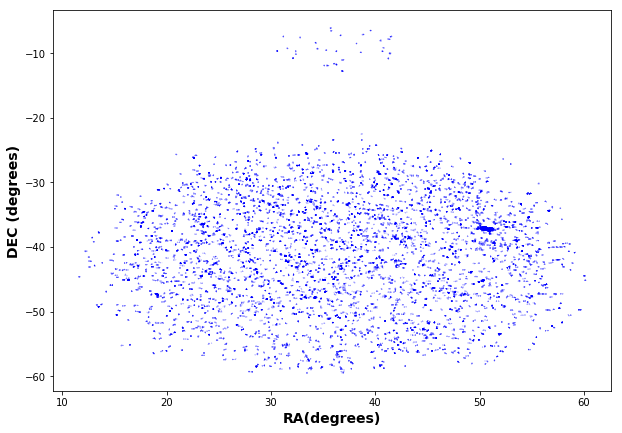

In [19]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = 'b' )
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

To improve these data plots, we will keep the I-band magnitudes proportional to the shape of the markers but we will add color. An array of the same length as the data is created containing random colors. A random color is then assigned to each point source and the point sources are graphed along with their components.

In [13]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
RA.shape[1]

2807

In [15]:
cols = ['gray', 'silver', 'rosybrown', 'firebrick', 'red', 'darksalmon', 'sienna', 'sandybrown', 'tan', 
       'gold', 'darkkhaki', 'olivedrab', 'chartreuse', 'darkgreen', 'seagreen', 'mediumspringgreen',
       'lightseagreen', 'darkcyan', 'darkturquoise', 'deepskyblue', 'slategray', 'royalblue', 'navy', 
       'blue', 'mediumpurple', 'darkorchid', 'm', 'mediumvioletred', 'palevioletred', 'lightcoral', 
       'maroon', 'coral', 'peachpuff', 'darkorange', 'orange', 'darkgoldenrod', 'olive', 'yellowgreen',
       'lawngreen', 'lightgreen', 'g', 'mediumseagreen', 'darkslategrey', 'cadetblue', 'skyblue', 
       'dodgerblue', 'darkblue', 'slateblue', 'rebeccapurple', 'darkviolet', 'violet', 'fuchia', 'deeppink', 
       'crimson', 'indianred', 'darkred', 'salmon', 'orangered', 'chocolate', 'peru', 'burlywood', 
       'goldenrod', 'y', 'darkolivegreen', 'forestgreen', 'springgreen', 'aquamarine', 'aqua', 'powderblue', 
       'lightskyblue', 'lightslategray', 'lavender', 'mediumblue', 'blueviolet', 'mediumorchid', 'hotpink', 
       'pink']
c_rand = np.random.choice(cols, RA.shape[1])

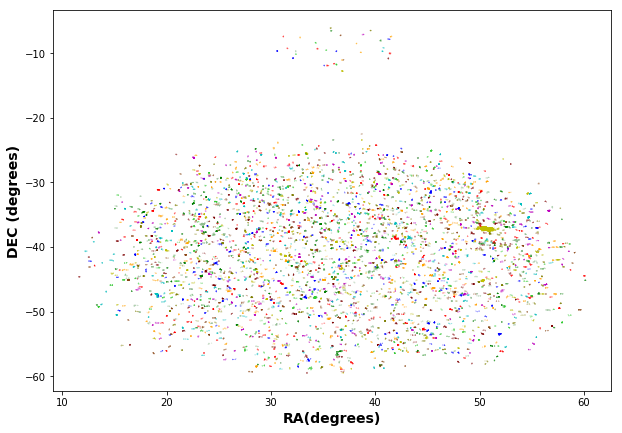

In [24]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

This plot is much easier to understand. There is one source that is clearly brighter than the others. We zoom in on this below to see the individual point sources that make up this bright object. Here, the I-band magnitude differences are more obvious and we can get a better look at the source.

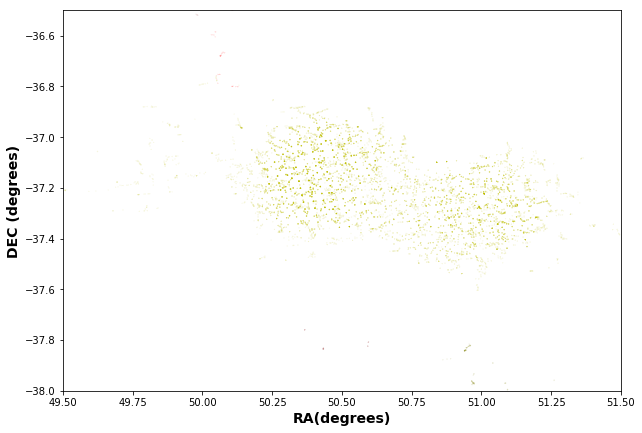

In [25]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(49.5, 51.5)
plt.ylim(-38, -36.5);

Just creating a function to do this for every data set in a directory

In [16]:
def create_radio_sky(directory):
    """

    Creates a graph of the radio sky for each given file in a directory

    """
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.rc('axes', labelsize=14)
    plt.rc('axes', labelweight='bold')
    plt.rc('axes', titlesize=16)
    plt.rc('axes', titleweight='bold')
    plt.rc('font', family='sans-serif')

    paths = glob.glob(directory + '*.sav')
    n = 0
    for path in paths[0:4]:
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        RA = np.array(data_seek['EO_sources_RA'])
        DEC = np.array(data_seek['EO_sources_DEC'])
        I = np.array(data_seek['EO_sources_I'])

        colors = ['r', 'y', 'm', 'g', 'c', 'b', 'orange', 'maroon', 'limegreen', 
                  'saddlebrown', 'darkseagreen', 'darkviolet', 'indigo']
        c_rand = np.random.choice(colors, RA.shape[1])
        plt.figure()
        #n = n+1
        #plt.subplot(100 + n)
        for i in range (0, RA.shape[1]):
            plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
            plt.xlabel('RA(degrees)')
            plt.ylabel('DEC (degrees)');
    return

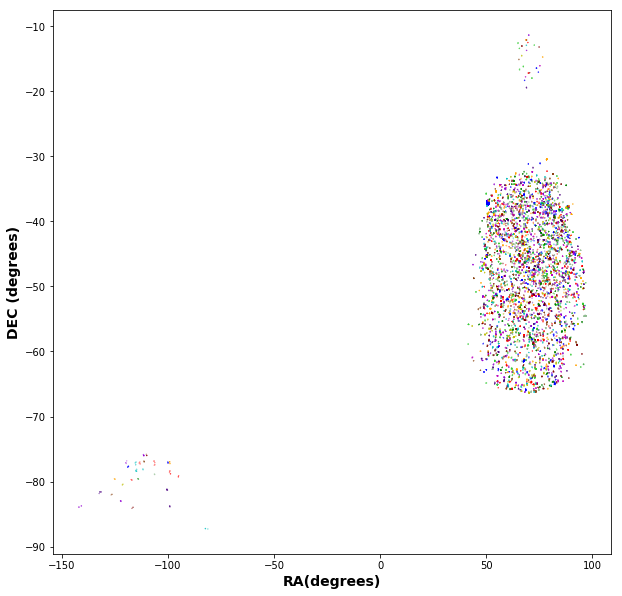

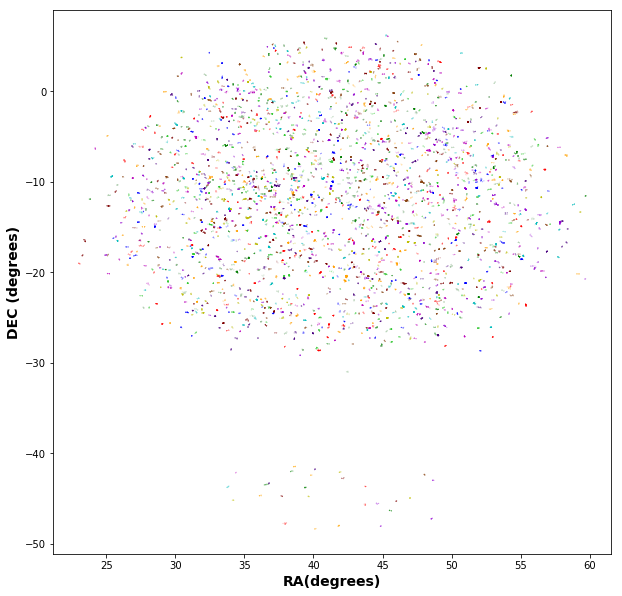

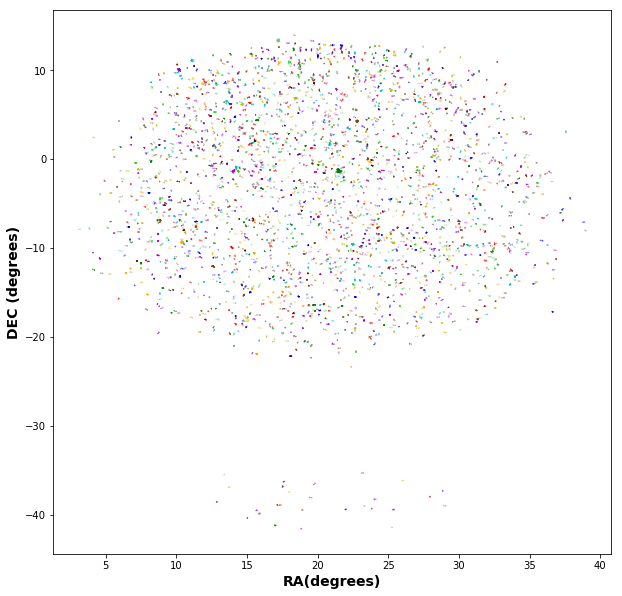

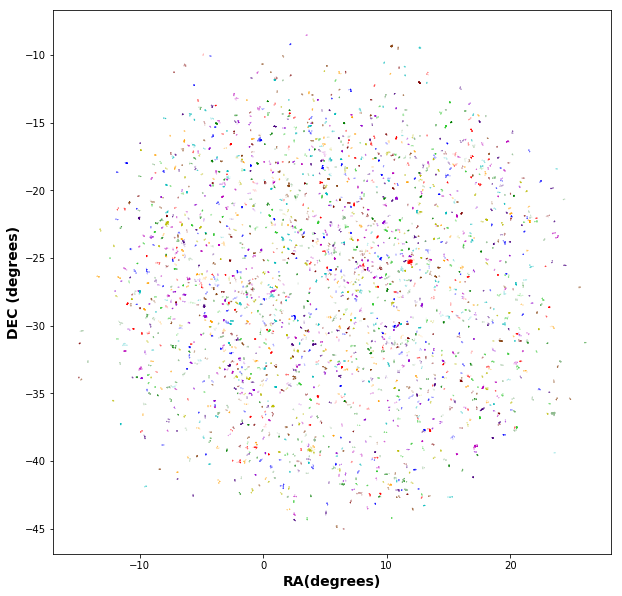

In [17]:
directory = '/home/kelcey/hera/Washington/uwashchamp2019/source_array_data/'

create_radio_sky(directory)

# Matching
We want to find a way to identify these individula sources throughout many sets of data. Below we match every data set in a given directory with one of the individual datum, specified by it's index. This is not the most efficient approach.

In [18]:
def table_match(directory, index):
    """
    Matches every image in a given directory and returns a Data Frame with the Ra, Dec, and 
    Magnitudes of each object in the images
    
    Directory is an absolute path to a directory containing the images
    
    index is the index of the image the rest of the images will be compared to
    
    """
    
    i = 0
    
    paths = glob.glob(directory + '*.sav')
    data0 = clst.collector(paths[index])
    data_seek0 = clst.seeker(data0)
    
    ra0 = np.array(data_seek0['EO_sources_RA'])[:][0]
    
    dec0 = np.array(data_seek0['EO_sources_DEC'])[:][0]
    
    mag0 = np.array(data_seek0['EO_sources_I'])[:][0]
    
    n=0
    df0 = pd.DataFrame({'RA': ra0[i],'Mag {}'.format(n): mag0[i],  'DEC' : dec0[i]})
    
    for path in paths[0:3]:
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        n = n + 1
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        ra = np.array(data_seek0['EO_sources_RA'])[:][0]
      
        dec = np.array(data_seek0['EO_sources_DEC'])[:][0]
       
        mag = np.array(data_seek0['EO_sources_I'])[:][0]


        catalog = SkyCoord(ra=ra[i]*u.deg, dec=dec[i]*u.deg)  
        c = SkyCoord(ra=ra0[i]*u.deg, dec=dec0[i]*u.deg)  
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

        s_n = pd.Series(mag[i][idx])
        df0['Mag {}'.format(n)] = s_n
        
    return df0

In [19]:
table = table_match(directory, 0)
table

TypeError: only integer scalar arrays can be converted to a scalar index

In [100]:
RA = np.array(data_seek['EO_sources_RA'])[:][0]
DEC = np.array(data_seek['EO_sources_DEC'])[:][0]
ras = [i * u.deg for i in RA]
decs = [i * u.deg for i in DEC]
SkyCoord(RA[0]*u.deg, DEC[0]*u.deg)

<SkyCoord (ICRS): (ra, dec) in deg
    [(50.32079 , -37.162556), (50.320404, -37.16155 ),
     (50.37978 , -37.21474 ), ..., (50.30701 , -37.34507 ),
     (49.82373 , -37.149242), (49.812176, -37.021797)]>

A better aproach: using GLEAM to match the data. If we use GLEAM instead of one of the data points, we will have an easier time trying to match things.


Running the commented out section of the following cell will produce an error. The function assumes that an aspect of the data is listed as 'source array' but it is listed as 'catalog' in our data. The function is re-written below to change this key word, but it would be a good idea to re-write the source code to avoid this error in the future.

In [7]:
GLEAM_path = '/home/kelcey/hera/Washington/GLEAM_v2_plus_rlb2019.sav'
GLEAM_data = clst.collector(GLEAM_path)
#GLEAM_seek = clst.seeker(GLEAM_data)
#GLEAM_seek

#Here, we get an error if we try to use the clst.seeker() function on the data. The function assumes
#that 

In [30]:
GLEAM_data['data'][0].keys()

['catalog']

In [5]:
def separator_catalog(data):
    '''
    The separator splits all data which has been read in by the collector
    into individual lists for point sources and extended sources.
    
    This is primarily written to be used by the Seeker.
    
    Args:
        data: The variable assigned to the IDL .sav file which has been
            read in by the collector.

    Returns:
        data: A dictonary containing two keys:
            1. "extsources": The same data structure containing only extended sources.
            2. "psources": The same data structure containing only point sources.
    '''

    # A source is determined to be a point source if
    # it does not contain any extended components.
    point_data = [[data['data'][i]['catalog'][j]
                   for j in range(len(data['data'][i]['catalog']))
                  if data['data'][i]['catalog'][j]['EXTEND'] is None]
                  for i in range(len(data['data']))]

    # A source is determined to be an extended source if
    # it does contain any extended components.
    extended_data = [[data['data'][i]['catalog'][j]
                      for j in range(len(data['data'][i]['catalog']))
                      if data['data'][i]['catalog'][j]['EXTEND']
                      is not None]
                     for i in range(len(data['data']))]

    return {'extsources': extended_data, 'psources': point_data}


In [6]:
def seeker_catalog(data):
    """
    The seeker splits all data which has been read in by the collector
    into individual lists for RA, DEC, FLUX, XX, and YY values.
    Separate lists are made for point sources, extended sources,
    and all sources.
    
    Args:
        data: The variable assigned to the IDL .sav file which has been
            read in by the collector.

    Returns:
        Separated lists for ID, X, Y, RA, DEC, STON, FREQ, ALPHA, GAIN, FLAG,
        XX, YY, XY, YX, I, Q, U, and V values for point sources, extended sources,
        and all sources.
    """

    # Separating data into point sources and extended sources.
    separated = separator_catalog(data)

    # Creating individual lists for RA, DEC, FLUX, XX, and YY values
    # for point sources.
    point_sources_ID = [[separated['psources'][i][j]['ID']
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_X = [[separated['psources'][i][j]['X']
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_Y = [[separated['psources'][i][j]['Y']
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_RA = [[separated['psources'][i][j]['RA']
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_DEC = [[separated['psources'][i][j]['DEC']
                          for j in range(len(separated['psources'][i]))]
                         for i in range(len(separated['psources']))]
    point_sources_STON = [[separated['psources'][i][j]['STON']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_FREQ = [[separated['psources'][i][j]['FREQ']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_ALPHA = [[separated['psources'][i][j]['ALPHA']
                            for j in range(len(separated['psources'][i]))]
                           for i in range(len(separated['psources']))]
    point_sources_GAIN = [[separated['psources'][i][j]['GAIN']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_FLAG = [[separated['psources'][i][j]['FLAG']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_XX = [[separated['psources'][i][j]['FLUX']['XX'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_YY = [[separated['psources'][i][j]['FLUX']['YY'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_XY = [[separated['psources'][i][j]['FLUX']['XY'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_YX = [[separated['psources'][i][j]['FLUX']['YX'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_I = [[separated['psources'][i][j]['FLUX']['I'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_Q = [[separated['psources'][i][j]['FLUX']['Q'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_U = [[separated['psources'][i][j]['FLUX']['U'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_V = [[separated['psources'][i][j]['FLUX']['V'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]

    # Creating individual lists for RA, DEC, FLUX, XX, and YY values
    # for extended sources.
    EO_sources_ID = [[[separated['extsources'][i][j]['EXTEND']['ID'][k]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['ID']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_X = [[[separated['extsources'][i][j]['EXTEND']['X'][k]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['X']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_Y = [[[separated['extsources'][i][j]['EXTEND']['Y'][k]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['Y']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k]
                        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))]
                       for j in range(len(separated['extsources'][i]))]
                      for i in range(len(separated['extsources']))]
    EO_sources_STON = [[[separated['extsources'][i][j]['EXTEND']['STON'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['STON']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_FREQ = [[[separated['extsources'][i][j]['EXTEND']['FREQ'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['FREQ']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_ALPHA = [[[separated['extsources'][i][j]['EXTEND']['ALPHA'][k]
                          for k in range(len(separated['extsources'][i][j]['EXTEND']['ALPHA']))]
                         for j in range(len(separated['extsources'][i]))]
                        for i in range(len(separated['extsources']))]
    EO_sources_GAIN = [[[separated['extsources'][i][j]['EXTEND']['GAIN'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['GAIN']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_FLAG = [[[separated['extsources'][i][j]['EXTEND']['FLAG'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['FLAG']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_XX = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['XX'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_YY = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['YY'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_XY = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['XY'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_YX = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['YX'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_Q = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['Q'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_U = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['U'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_V = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['V'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]

    # Fixing RA values to range between -180 and +180.
    for i in range(len(data['data'])):
        for j in range(len(EO_sources_RA[i])):
            for k in range(len(EO_sources_RA[i][j])):
                if EO_sources_RA[i][j][k] > 180:
                    EO_sources_RA[i][j][k] -= 360
        for j in range(len(point_sources_RA[i])):
            if point_sources_RA[i][j] > 180:
                point_sources_RA[i][j] -= 360

    # Adding point source and extended source lists to create
    # lists for RA, DEC, FLUX, XX, and YY values for all sources.
    all_RA = [[point_sources_RA[i][j]
               for j in range(len(point_sources_RA[i]))] +
              [EO_sources_RA[i][j][k]
              for j in range(len(EO_sources_RA[i]))
              for k in range(len(EO_sources_RA[i][j]))]
              for i in range(len(data['data']))]
    all_DEC = [[point_sources_DEC[i][j]
                for j in range(len(point_sources_DEC[i]))] +
               [EO_sources_DEC[i][j][k]
               for j in range(len(EO_sources_DEC[i]))
               for k in range(len(EO_sources_DEC[i][j]))]
               for i in range(len(data['data']))]
    all_I = [[point_sources_I[i][j]
              for j in range(len(point_sources_I[i]))] +
             [EO_sources_I[i][j][k]
             for j in range(len(EO_sources_I[i]))
             for k in range(len(EO_sources_I[i][j]))]
             for i in range(len(data['data']))]
    all_XX = [[point_sources_XX[i][j]
               for j in range(len(point_sources_XX[i]))] +
              [EO_sources_XX[i][j][k]
              for j in range(len(EO_sources_XX[i]))
              for k in range(len(EO_sources_XX[i][j]))]
              for i in range(len(data['data']))]
    all_YY = [[point_sources_YY[i][j]
               for j in range(len(point_sources_YY[i]))] +
              [EO_sources_YY[i][j][k]
              for j in range(len(EO_sources_YY[i]))
              for k in range(len(EO_sources_YY[i][j]))]
              for i in range(len(data['data']))]
    all_BEAM = [np.asarray(np.asarray(all_XX[i]) +
                np.asarray(all_YY[i])) / np.asarray(all_I[i])
                for i in range(len(data['data']))]

    return {'point_sources_ID': point_sources_ID,
            'point_sources_X': point_sources_X,
            'point_sources_Y': point_sources_Y,
            'point_sources_RA': point_sources_RA,
            'point_sources_DEC': point_sources_DEC,
            'point_sources_STON': point_sources_STON,
            'point_sources_FREQ': point_sources_FREQ,
            'point_sources_ALPHA': point_sources_ALPHA,
            'point_sources_GAIN': point_sources_GAIN,
            'point_sources_FLAG': point_sources_FLAG,
            'point_sources_XX': point_sources_XX,
            'point_sources_YY': point_sources_YY,
            'point_sources_XY': point_sources_XY,
            'point_sources_YX': point_sources_YX,
            'point_sources_I': point_sources_I,
            'point_sources_Q': point_sources_Q,
            'point_sources_U': point_sources_U,
            'point_sources_V': point_sources_V,
            'EO_sources_ID': EO_sources_ID,
            'EO_sources_X': EO_sources_X,
            'EO_sources_Y': EO_sources_Y,
            'EO_sources_RA': EO_sources_RA,
            'EO_sources_DEC': EO_sources_DEC,
            'EO_sources_STON': EO_sources_STON,
            'EO_sources_FREQ': EO_sources_FREQ,
            'EO_sources_ALPHA': EO_sources_ALPHA,
            'EO_sources_GAIN': EO_sources_GAIN,
            'EO_sources_FLAG': EO_sources_FLAG,
            'EO_sources_XX': EO_sources_XX,
            'EO_sources_YY': EO_sources_YY,
            'EO_sources_XY': EO_sources_XY,
            'EO_sources_YX': EO_sources_YX,
            'EO_sources_I': EO_sources_I,
            'EO_sources_Q': EO_sources_Q,
            'EO_sources_U': EO_sources_U,
            'EO_sources_V': EO_sources_V,
            'all_RA': all_RA, 'all_DEC': all_DEC, 'all_I': all_I,
            'all_XX': all_XX, 'all_YY': all_YY, 'all_BEAM': all_BEAM}

In [24]:
GLEAM_seek = seeker_catalog(GLEAM_data)
GLEAM_seek

{'EO_sources_ALPHA': [[[-0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    

In [25]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

A quick look at the GLEAM data: random colors are assigned to individual points whose sizes are proportional to their I-band magnitudes

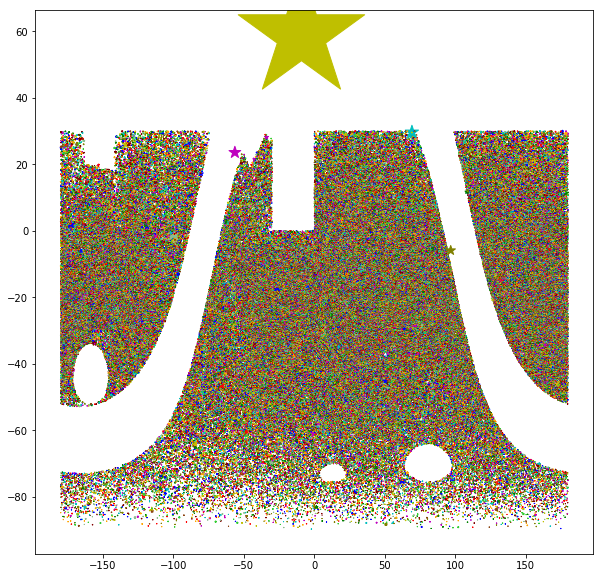

In [95]:
ra_gleam = GLEAM_seek['point_sources_RA']
dec_gleam = GLEAM_seek['point_sources_DEC']
imag_gleam = GLEAM_seek['point_sources_I']
c_rand = np.random.choice(colors, len(ra_gleam[0]))
plt.scatter(ra_gleam, dec_gleam, color = c_rand , marker = '*', s = imag_gleam);

Below we try to re-write the matching function to use GLEAM

Link to documentation: https://docs.astropy.org/en/stable/coordinates/matchsep.html

In [123]:
def match_to_gleam(directory, GLEAM_seek):
    """
    Matches all the .sav files in a given directory with GLEAM
    
    directory is an absolute path to the data
    
    GLEAM_seek is the GLEAM catalog after being run through the corrected seeker function
    
    """
    #Create paths to all the .sav files in the specified directory
    paths = glob.glob(directory + '*.sav')
    
    #Load the GLEAM data
    ra_gleam = np.array(GLEAM_seek['point_sources_RA'][0])
    dec_gleam = np.array(GLEAM_seek['point_sources_DEC'][0])
    imag_gleam = np.array(GLEAM_seek['point_sources_I'][0])
    
    #Create a Pandas Data Frame with the RA, DEC, and GLEAM Magnitudes
    n=0
    df = pd.DataFrame({'RA': ra_gleam,'Mag GLEAM': imag_gleam,  'DEC' : dec_gleam})
    
    #Look at each path in the directory
    #WARNING: 2 files takes 15-20 minutes to load. DO NOT change the indecies unless 
    #you are prepared to wait a while. There are over 300k stars in GLEAM
    for path in paths:
        
        #Collect the data for each path
        n = n + 1
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        ra = np.array(data_seek['point_sources_RA'][0])
        dec = np.array(data_seek['point_sources_DEC'][0])
        imag = np.array(data_seek['point_sources_I'][0])


        #Match this path with the GLEAM catalog
        #idx: an array of indices corresponding to matches
        #d2d: the two dimensional distances between these matches
        #d3d: three dimensional distances between matches. This array is blank becasue we do 
        #not have 3 dimensional data, but the match_to_catalog_sky function requires it anyway
        catalog = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)  
        c = SkyCoord(ra=ra_gleam*u.deg, dec=dec_gleam*u.deg)  
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)  
        
        
        #Possible source of error because the below statement is worded a little strange
        #Only return matches within one degree 
        mags = []
        imags = imag[idx]
        nums = np.arange(0, len(idx))
        for num in nums:
            if (d2d[num] < (0.05*u.deg)) and ((imags[num] > imag_gleam[num] + (3/4)*imag_gleam[num]) or (imags[num] > (3/4)*imag_gleam[num])):
                mags.append(imags[num])
            else: 
                mags.append(0)
                
        #Add a new column to the data frame with the information from this path      
        s_mag = pd.Series(mags)
        s_dist = pd.Series(d2d)
        df['Mag {}'.format(n)] = s_mag
        df['Distance {}'.format(n)] = s_dist
        
        
        #s_mag = pd.Series(imag[idx])
        #s_dist = pd.Series(d2d)
        #df['Mag {}'.format(n)] = s_mag
        #df['Distance {}'.format(n)] = s_dist
        
        
        
        #0.001 degrees(3.6 arcsec) = 5 matches for Mag 1
        #0.005 degrees (18 arcsec) = 203 matches for Mag 1
        #0.008 degrees (28.8 arcsec) = 650 matches for Mag 1
        #0.01 degree (36 arcesc) = 1126 matches for Mag 1
        #0.02 degrees(72 arcsec) = 2862 matched for Mag 1
        #0.03 degrees(108 arcsec) = 3500+ matches for Mag1
        
    return df

In [8]:
GLEAM_path = '/home/kelcey/hera/Washington/GLEAM_v2_plus_rlb2019.sav'
GLEAM_data = clst.collector(GLEAM_path)
GLEAM_seek = seeker_catalog(GLEAM_data)
#I changed the structure of this code so that this bit of code can be run outside the function. 
# It takes a while to load and this cuts down a but on run time

In [13]:
directory = '/home/kelcey/hera/Washington/uwashchamp2019/source_array_data/'
table = match_to_gleam(directory, GLEAM_seek)
table
#run with 0.01 deg match and no magnitude adjustment

DEC     Mag GLEAM          RA  Mag 1  Distance 1  Mag 2  \
0      -89.687309      0.303373   -2.085632    0.0   23.563060    0.0   
1      -89.213310      0.227618  -21.663757    0.0   23.680776    0.0   
2      -89.155968      0.451251  -11.600952    0.0   23.533056    0.0   
3      -88.750610      1.528642  -14.703156    0.0   23.530511    0.0   
4      -88.740990      0.290795  -41.215271    0.0   24.102623    0.0   
5      -88.825325      0.315769  -10.407288    0.0   23.451766    0.0   
6      -88.430840      0.253299   -8.097626    0.0   23.318865    0.0   
7      -88.290367      0.113284  -24.161621    0.0   23.766096    0.0   
8      -88.139534      0.416708  -15.071472    0.0   23.482828    0.0   
9      -88.058319      0.426634   -0.703857    0.0   23.000990    0.0   
10     -88.083977      0.364179   -5.521973    0.0   23.163719    0.0   
11     -87.923241      0.101682  -33.995789    0.0   24.146391    0.0   
12     -87.785049      0.358127  -27.142395    0.0   23.922649    0.0   
13     -87.633049      0.037855  -29.049164    0.0   24.022700    0.0   
14     -87.679802      0.161100  -29.197479    0.0   24.020107    0.0   
15     -87.602364      0.731250  -14.716095    0.0   23.431359    0.0   
16     -87.412720      0.220024  -32.181641    0.0   24.201864    0.0   
17     -87.522263      0.248584  -13.101196    0.0   23.356773    0.0   
18     -87.461739      0.409115  -19.270203    0.0   23.624405    0.0   
19     -87.319031      0.047056  -35.676086    0.0   24.381919    0.0   
20     -87.474701      0.142159  -10.594269    0.0   23.242806    0.0   
21     -87.453537      0.088043  -21.855133    0.0   23.739308    0.0   
22     -87.364082      0.139261   -2.571747    0.0   22.867147    0.0   
23     -87.191841      0.013502  -35.034760    0.0   24.390841    0.0   
24     -87.250534      0.175932  -27.447723    0.0   24.019795    0.0   
25     -87.179291      0.229824  -32.254242    0.0   24.263050    0.0   
26     -87.095757      0.252373   -7.220490    0.0   23.027030    0.0   
27     -87.179016      0.525889  -14.238434    0.0   23.384534    0.0   
28     -87.079651      0.501711   -2.520325    0.0   22.790442    0.0   
29     -86.904198      0.182995  -28.588501    0.0   24.141439    0.0   
...           ...           ...         ...    ...         ...    ...   
307428  29.971245      1.519213  -93.646545    0.0  138.437765    0.0   
307429  29.717297      0.295790 -108.474823    0.0  143.135377    0.0   
307430  29.794407      0.720863 -100.027863    0.0  140.855082    0.0   
307431  29.783333      5.447074 -103.970123    0.0  142.311192    0.0   
307432  29.811129      1.875155 -101.616821    0.0  141.473663    0.0   
307433  29.843433      0.404300 -111.417267    0.0  143.416522    0.0   
307434   8.914019      1.918836  -95.944092    0.0  120.132782    0.0   
307435   8.817615      0.628462  -97.751587    0.0  120.614887    0.0   
307436   8.677989      0.307917 -108.004089    0.0  122.225288    0.0   
307437   8.786252      0.218762 -111.738876    0.0  122.420873    0.0   
307438   9.102604      0.264672 -117.386383    0.0  122.028110    0.0   
307439   9.153099      0.223509  -92.058685    0.0  118.963499    0.0   
307440   8.877378      0.329359  -96.172974    0.0  120.171928    0.0   
307441   9.095340      0.260390 -117.064209    0.0  122.080506    0.0   
307442  10.536336      0.909025 -130.350067    0.0  120.089458    0.0   
307443   8.665218      0.087867 -106.050400    0.0  121.974079    0.0   
307444   8.691673      1.164105 -106.580627    0.0  122.068055    0.0   
307445   8.720312      0.391966 -108.885666    0.0  122.318203    0.0   
307446  21.503145      4.256060  -32.058319    0.0   95.991073    0.0   
307447   8.709949      1.582839 -102.747498    0.0  121.512777    0.0   
307448  11.380795      0.246387 -135.755478    0.0  118.554485    0.0   
307449  20.015001      0.073938  -37.363953    0.0   98.757926    0.0   
307450  19.062172      0.139085  -40.931946    0.0  100.588973    0.0   

In [124]:
mag_table = match_to_gleam(directory, GLEAM_seek)
mag_table

DEC     Mag GLEAM          RA  Mag 1  Distance 1  Mag 2  \
0      -89.687309      0.303373   -2.085632    0.0   23.563060    0.0   
1      -89.213310      0.227618  -21.663757    0.0   23.680776    0.0   
2      -89.155968      0.451251  -11.600952    0.0   23.533056    0.0   
3      -88.750610      1.528642  -14.703156    0.0   23.530511    0.0   
4      -88.740990      0.290795  -41.215271    0.0   24.102623    0.0   
5      -88.825325      0.315769  -10.407288    0.0   23.451766    0.0   
6      -88.430840      0.253299   -8.097626    0.0   23.318865    0.0   
7      -88.290367      0.113284  -24.161621    0.0   23.766096    0.0   
8      -88.139534      0.416708  -15.071472    0.0   23.482828    0.0   
9      -88.058319      0.426634   -0.703857    0.0   23.000990    0.0   
10     -88.083977      0.364179   -5.521973    0.0   23.163719    0.0   
11     -87.923241      0.101682  -33.995789    0.0   24.146391    0.0   
12     -87.785049      0.358127  -27.142395    0.0   23.922649    0.0   
13     -87.633049      0.037855  -29.049164    0.0   24.022700    0.0   
14     -87.679802      0.161100  -29.197479    0.0   24.020107    0.0   
15     -87.602364      0.731250  -14.716095    0.0   23.431359    0.0   
16     -87.412720      0.220024  -32.181641    0.0   24.201864    0.0   
17     -87.522263      0.248584  -13.101196    0.0   23.356773    0.0   
18     -87.461739      0.409115  -19.270203    0.0   23.624405    0.0   
19     -87.319031      0.047056  -35.676086    0.0   24.381919    0.0   
20     -87.474701      0.142159  -10.594269    0.0   23.242806    0.0   
21     -87.453537      0.088043  -21.855133    0.0   23.739308    0.0   
22     -87.364082      0.139261   -2.571747    0.0   22.867147    0.0   
23     -87.191841      0.013502  -35.034760    0.0   24.390841    0.0   
24     -87.250534      0.175932  -27.447723    0.0   24.019795    0.0   
25     -87.179291      0.229824  -32.254242    0.0   24.263050    0.0   
26     -87.095757      0.252373   -7.220490    0.0   23.027030    0.0   
27     -87.179016      0.525889  -14.238434    0.0   23.384534    0.0   
28     -87.079651      0.501711   -2.520325    0.0   22.790442    0.0   
29     -86.904198      0.182995  -28.588501    0.0   24.141439    0.0   
...           ...           ...         ...    ...         ...    ...   
307428  29.971245      1.519213  -93.646545    0.0  138.437765    0.0   
307429  29.717297      0.295790 -108.474823    0.0  143.135377    0.0   
307430  29.794407      0.720863 -100.027863    0.0  140.855082    0.0   
307431  29.783333      5.447074 -103.970123    0.0  142.311192    0.0   
307432  29.811129      1.875155 -101.616821    0.0  141.473663    0.0   
307433  29.843433      0.404300 -111.417267    0.0  143.416522    0.0   
307434   8.914019      1.918836  -95.944092    0.0  120.132782    0.0   
307435   8.817615      0.628462  -97.751587    0.0  120.614887    0.0   
307436   8.677989      0.307917 -108.004089    0.0  122.225288    0.0   
307437   8.786252      0.218762 -111.738876    0.0  122.420873    0.0   
307438   9.102604      0.264672 -117.386383    0.0  122.028110    0.0   
307439   9.153099      0.223509  -92.058685    0.0  118.963499    0.0   
307440   8.877378      0.329359  -96.172974    0.0  120.171928    0.0   
307441   9.095340      0.260390 -117.064209    0.0  122.080506    0.0   
307442  10.536336      0.909025 -130.350067    0.0  120.089458    0.0   
307443   8.665218      0.087867 -106.050400    0.0  121.974079    0.0   
307444   8.691673      1.164105 -106.580627    0.0  122.068055    0.0   
307445   8.720312      0.391966 -108.885666    0.0  122.318203    0.0   
307446  21.503145      4.256060  -32.058319    0.0   95.991073    0.0   
307447   8.709949      1.582839 -102.747498    0.0  121.512777    0.0   
307448  11.380795      0.246387 -135.755478    0.0  118.554485    0.0   
307449  20.015001      0.073938  -37.363953    0.0   98.757926    0.0   
307450  19.062172      0.139085  -40.931946    0.0  100.588973    0.0   

Some of these data points appear to be a little off on first glance. The first row shows matching distances of 23 and 59 degrees, a huge distance. It is clear what is going on when the below plot is considered. These data sources only cover small fractions of what GLEAM covers and are very far from most of the sources in the GLEAM data. This is why the matching distance cut off is so important. 

In [107]:
matches1 = np.nonzero(table['Mag 1'])
matches2 = np.nonzero(table['Mag 2'])
print(matches1[0].shape,matches2[0].shape) 

((1126,), (2003,))


In [119]:
matches_1 = np.nonzero(mag_table['Mag 1'])
matches_2 = np.nonzero(mag_table['Mag 2'])
print(matches_1[0].shape,matches_2[0].shape) 

((3256,), (3614,))


In [66]:
matches = np.array(table['Mag 2'])

matches.argmax()
#np.array(table['Mag 3'])[2225]
#matches

115080

In [120]:
table.loc[115080]

DEC           -19.542252
Mag GLEAM      19.784145
RA             39.431751
Mag 1           0.000000
Distance 1     18.421374
Mag 2          20.553389
Distance 2      0.006362
Mag 3           0.000000
Distance 3      3.941677
Mag 4           0.000000
Distance 4     14.760599
Mag 5          20.139790
Distance 5      0.007850
Mag 6           0.000000
Distance 6      3.643876
Mag 7           0.000000
Distance 7      0.011555
Mag 8           0.000000
Distance 8     17.535887
Mag 9           0.000000
Distance 9     42.408705
Mag 10          0.000000
Distance 10    43.700263
Mag 11          0.000000
Distance 11    15.029873
Mag 12         19.325361
Distance 12     0.008297
Mag 13          0.000000
Distance 13    10.733318
Mag 14          0.000000
                 ...    
Mag 43          0.000000
Distance 43    35.281607
Mag 44          0.000000
Distance 44    27.789951
Mag 45          0.000000
Distance 45    38.767842
Mag 46          0.000000
Distance 46    17.871592
Mag 47          0.000000


In [83]:
mag_matches = table.loc[115080][1::2]
for mags in mag_matches:
    if mags !=0:
        matches = [mags for mags in mag_matches]

        
mag_matches

Mag GLEAM    19.784145
Mag 1         0.000000
Mag 2        20.553389
Mag 3         0.000000
Mag 4         0.000000
Mag 5        20.139790
Mag 6         0.000000
Mag 7         0.000000
Mag 8         0.000000
Mag 9         0.000000
Mag 10        0.000000
Mag 11        0.000000
Mag 12       19.325361
Mag 13        0.000000
Mag 14        0.000000
Mag 15        0.000000
Mag 16        0.000000
Mag 17       18.990742
Mag 18        0.000000
Mag 19        0.000000
Mag 20        0.000000
Mag 21        0.000000
Mag 22       20.466190
Mag 23        0.000000
Mag 24        0.000000
Mag 25        0.000000
Mag 26        0.000000
Mag 27        0.000000
Mag 28        0.000000
Mag 29        0.000000
Mag 30        0.000000
Mag 31        0.000000
Mag 32        0.000000
Mag 33       18.557331
Mag 34        0.000000
Mag 35       21.054008
Mag 36        0.000000
Mag 37        0.000000
Mag 38        0.000000
Mag 39        0.000000
Mag 40        0.000000
Mag 41        0.000000
Mag 42       19.433287
Mag 43     

In [94]:
mag_inds = np.arange(0, len(table.loc[115080][1::2]))
for i in mag_inds:
    if table.loc[115080][1::2][i] >0:
        mtch = [table.loc[115080][1::2][i] for i in mag_inds]
mtch

[19.78414535522461,
 0.0,
 20.553388595581055,
 0.0,
 0.0,
 20.139789581298828,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.325361251831055,
 0.0,
 0.0,
 0.0,
 0.0,
 18.990741729736328,
 0.0,
 0.0,
 0.0,
 0.0,
 20.466190338134766,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.557331085205078,
 0.0,
 21.05400848388672,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.433286666870117,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 21.050962448120117,
 0.0,
 0.0,
 20.144174575805664,
 0.0]

In [125]:
mags = np.array(mag_table.loc[115080][1::2])
mtchs = []
for mag in mags:
    if mag > 0:
        mtchs.append(mag)
mtchs

[19.78414535522461,
 20.553388595581055,
 20.139789581298828,
 17.713228225708008,
 19.325361251831055,
 18.990741729736328,
 20.466190338134766,
 18.557331085205078,
 21.05400848388672,
 19.433286666870117,
 21.050962448120117,
 20.144174575805664]

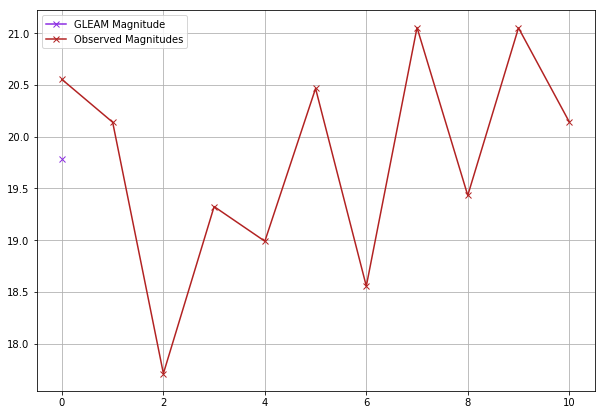

In [126]:
plt.plot(mtchs[0], color = 'blueviolet', label = 'GLEAM Magnitude', marker = 'x')
plt.plot(mtchs[1:], color = 'firebrick', label = 'Observed Magnitudes', marker = 'x')
plt.legend()
plt.grid()

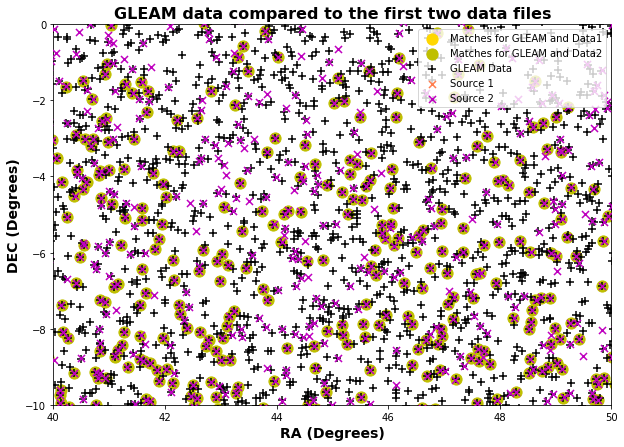

In [11]:
match1 = (table['Mag 1'] != 0)
match2 = (table['Mag 2'] != 0)

plt.scatter(table['RA'][match1], table['DEC'][match1], marker = '.', 
             label = 'Matches for GLEAM and Data1', color = 'gold', zorder = 0, s = 500)

plt.scatter(table['RA'][match2], table['DEC'][match2], marker = '.', 
            label = 'Matches for GLEAM and Data2', color = 'y', zorder = 1, s=500)


ra_gleam = np.array(GLEAM_seek['point_sources_RA'][0])
dec_gleam = np.array(GLEAM_seek['point_sources_DEC'][0])
imag_gleam = np.array(GLEAM_seek['point_sources_I'][0])
    
    
paths = glob.glob(directory + '*.sav')
data0 = clst.collector(paths[0])
data_seek0 = clst.seeker(data0)

data1 = clst.collector(paths[1])
data_seek1 = clst.seeker(data1)

plt.scatter(ra_gleam, dec_gleam, color = 'k', marker = '+', label = 'GLEAM Data',
            zorder = 2, s = 50)
plt.scatter(np.array(data_seek0['point_sources_RA'][0]), 
            np.array(data_seek0['point_sources_DEC'][0]), 
            color = 'coral', marker = 'x', label = 'Source 1', zorder = 3, s = 50)
plt.scatter(np.array(data_seek1['point_sources_RA'][0]), 
            np.array(data_seek1['point_sources_DEC'][0]), 
            color = 'm', marker = 'x', label = 'Source 2', zorder = 4, s = 50)
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('GLEAM data compared to the first two data files')

plt.ylim(-10, 0)
plt.xlim(40, 50)

plt.legend();

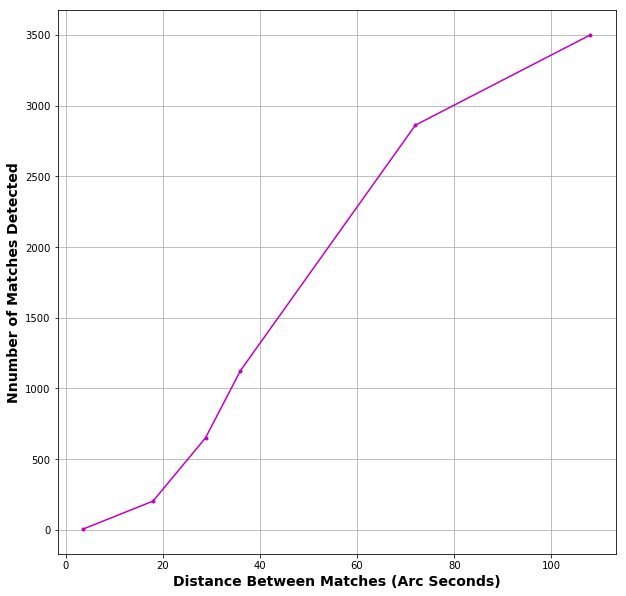

In [48]:
distances = [3.6, 18, 28.8, 36, 72, 108] 
matches = [5, 203, 650, 1126, 2862, 3500] 
plt.plot(distances, matches, color = 'm', marker = '.')
plt.xlabel('Distance Between Matches (Arc Seconds)')
plt.ylabel('Nnumber of Matches Detected')
plt.grid();

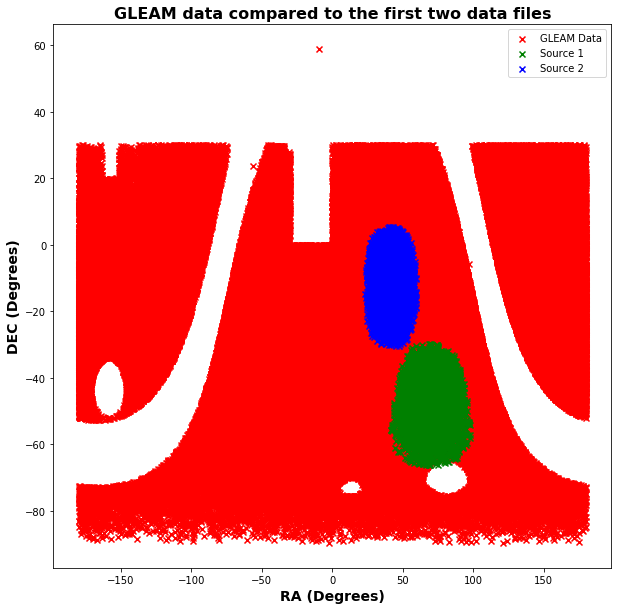

In [93]:
paths = glob.glob(directory + '*.sav')
data0 = clst.collector(paths[0])
data_seek0 = clst.seeker(data0)

data1 = clst.collector(paths[1])
data_seek1 = clst.seeker(data1)

plt.scatter(ra_gleam, dec_gleam, color = 'r', marker = 'x', label = 'GLEAM Data')
plt.scatter(np.array(data_seek0['point_sources_RA'][0]), np.array(data_seek0['point_sources_DEC'][0]), 
            color = 'g', marker = 'x', label = 'Source 1')
plt.scatter(np.array(data_seek1['point_sources_RA'][0]), np.array(data_seek1['point_sources_DEC'][0]), 
            color = 'b', marker = 'x', label = 'Source 2')
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('GLEAM data compared to the first two data files')
plt.legend();

Looking at a closer portion of the data

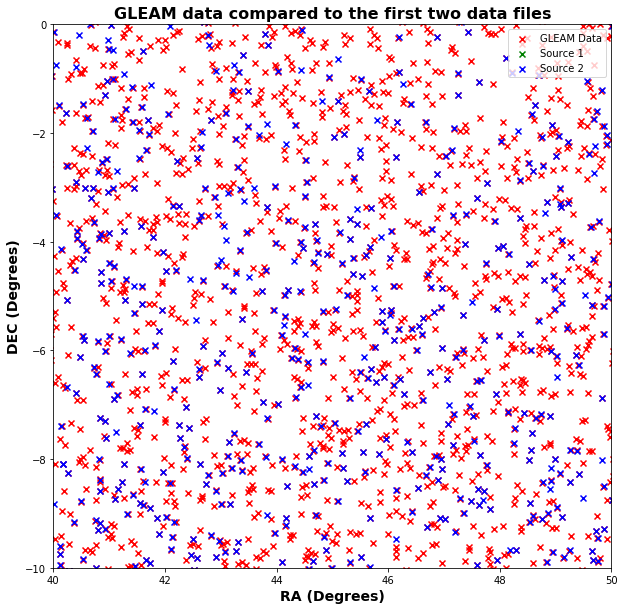

In [109]:
plt.scatter(ra_gleam, dec_gleam, color = 'r', marker = 'x', label = 'GLEAM Data')
plt.scatter(np.array(data_seek0['point_sources_RA'][0]), np.array(data_seek0['point_sources_DEC'][0]), 
            color = 'g', marker = 'x', label = 'Source 1')
plt.scatter(np.array(data_seek1['point_sources_RA'][0]), np.array(data_seek1['point_sources_DEC'][0]), 
            color = 'b', marker = 'x', label = 'Source 2')
plt.ylim(-10, 0)
plt.xlim(40, 50)

plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('GLEAM data compared to the first two data files')
plt.legend();

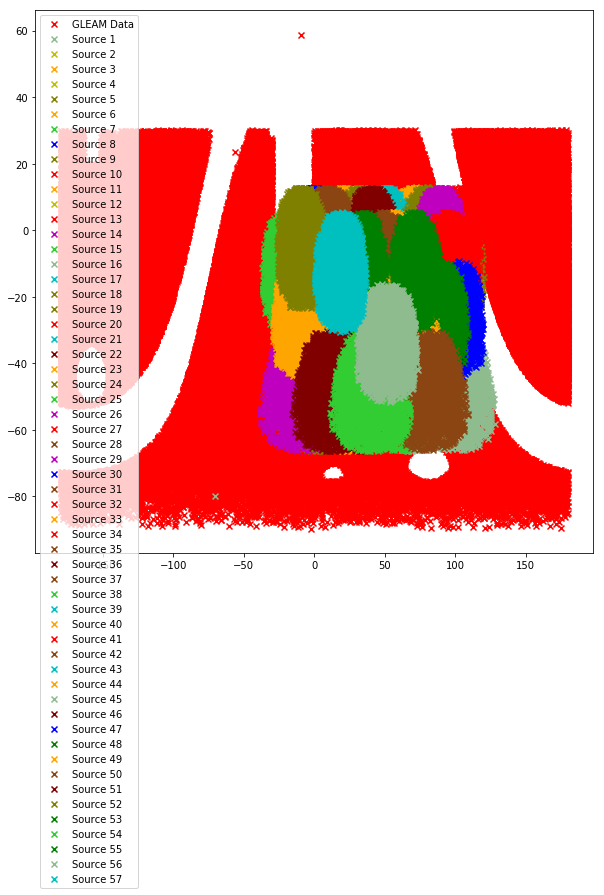

In [126]:
paths = glob.glob(directory + '*.sav')
plt.scatter(ra_gleam, dec_gleam, color = 'k', marker = 'x', label = 'GLEAM Data')
n = 0
for path in paths:
    n = n + 1
    
    data_n = clst.collector(path)
    data_seek_n = clst.seeker(data_n)
    
    plt.scatter(np.array(data_seek_n['point_sources_RA'][0]), np.array(data_seek_n['point_sources_DEC'][0]), 
            color = c_rand[n], marker = 'x', label = 'Source {}'.format(n));
    
plt.legend(); 

Below is a cell that can be run to display the non-zero entries in the Pandas DataFrame.

It is important to determine what would be the best cut off for the matching distance arrays. Too small a cut off and there will be no matches. Too large a cut off and the computer will match GLEAM data out of range for a data set with the closest possible point.

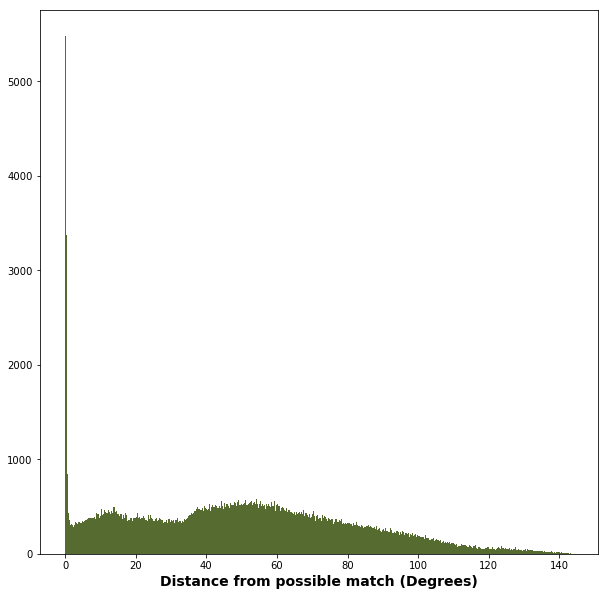

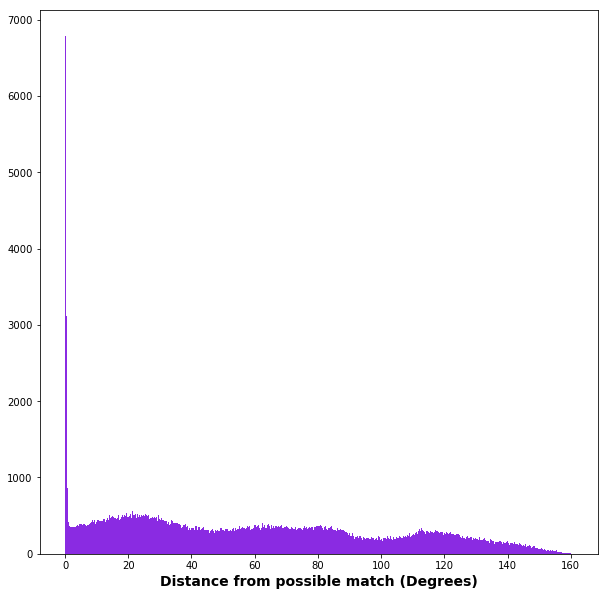

In [124]:
dists1 = table['Distance 1']
dists2 =  table['Distance 2']

plt.figure()
plt.hist(dists1, bins = 1000, color = 'darkolivegreen', label = 'Matching Distances for Data Set 1')
plt.xlabel('Distance from possible match (Degrees)')

plt.figure()
plt.hist(dists2, bins = 1000, color = 'blueviolet', label = 'Matching Distances for Data Set 2')
plt.xlabel('Distance from possible match (Degrees)');

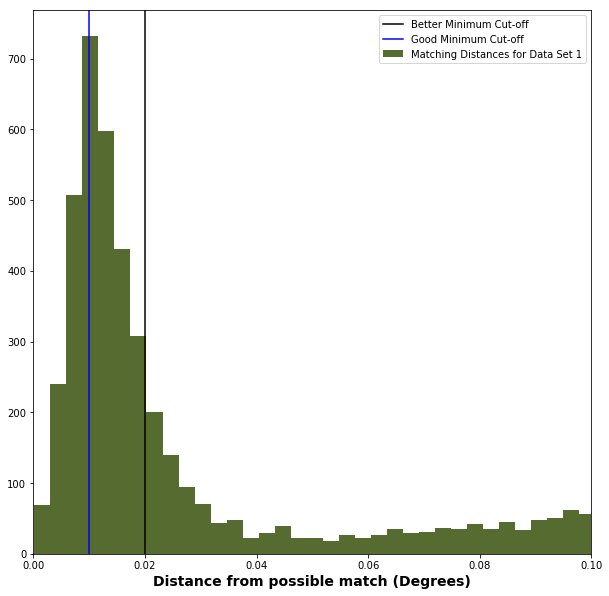

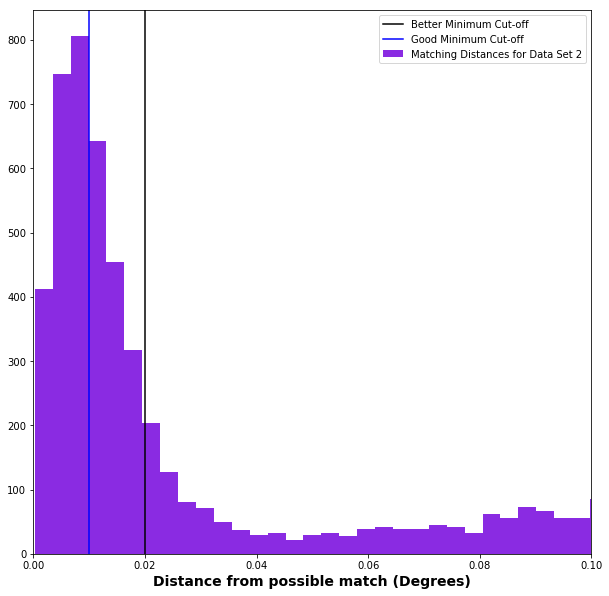

In [49]:
dists1 = table['Distance 1']
dists2 =  table['Distance 2']

plt.figure()
plt.hist(dists1, bins = 50000, color = 'darkolivegreen', label = 'Matching Distances for Data Set 1')
plt.xlabel('Distance from possible match (Degrees)')
plt.xlim(0, .1)
plt.axvline(0.02, color = 'k', label = 'Better Minimum Cut-off')
plt.axvline(0.01, color = 'b', label = 'Good Minimum Cut-off')
plt.legend()

plt.figure()
plt.hist(dists2, bins = 50000, color = 'blueviolet', label = 'Matching Distances for Data Set 2')
plt.xlabel('Distance from possible match (Degrees)')
plt.axvline(0.02, color = 'k', label = 'Better Minimum Cut-off')
plt.axvline(0.01, color = 'b', label = 'Good Minimum Cut-off')
plt.xlim(0, .1)
plt.legend();

# Matching the FHDs to GLEAM

In [165]:
def match_to_FHD(directory, GLEAM_seek):
    """
    Matches all the .sav files in a given directory with GLEAM
    
    directory is an absolute path to the data
    
    GLEAM_seek is the GLEAM catalog after being run through the corrected seeker function
    
    """
    #Create paths to all the .sav files in the specified directory
    paths = glob.glob(directory + '*.sav')
    
    #Load the GLEAM data
    ra_gleam = np.array(GLEAM_seek['point_sources_RA'][0])
    dec_gleam = np.array(GLEAM_seek['point_sources_DEC'][0])
    imag_gleam = np.array(GLEAM_seek['point_sources_I'][0])
    
    #Create a Pandas Data Frame with the RA, DEC, and GLEAM Magnitudes
    n=0
    df = pd.DataFrame({'RA': ra_gleam,'Mag GLEAM': imag_gleam,  'DEC' : dec_gleam})
    
    #Look at each path in the directory
    #WARNING: 2 files takes 15-20 minutes to load. DO NOT change the indecies unless 
    #you are prepared to wait a while. There are over 300k stars in GLEAM
    dfs = []
    for path in paths[0:3]:
        
        #Collect the data for each path
        n = n + 1
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        ra = np.array(data_seek['point_sources_RA'][0])
        dec = np.array(data_seek['point_sources_DEC'][0])
        imag = np.array(data_seek['point_sources_I'][0])


        #Match this path with the GLEAM catalog
        #idx: an array of indices corresponding to matches
        #d2d: the two dimensional distances between these matches
        #d3d: three dimensional distances between matches. This array is blank becasue we do 
        #not have 3 dimensional data, but the match_to_catalog_sky function requires it anyway
        c = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)  
        catalog = SkyCoord(ra=ra_gleam*u.deg, dec=dec_gleam*u.deg)  
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)  
        
        
        #Possible source of error because the below statement is worded a little strange
        #Only return matches within one degree 
        mags = []
        imags = imag_gleam[idx]
        nums = np.arange(0, len(idx))
        for num in nums:
            if (d2d[num] < (0.1*u.deg)) and ((imags[num] > imag[num] + (1/4)*imag[num]) or (imags[num] > (1/4)*imag[num])):
                mags.append(imags[num])
            else: 
                mags.append(0)
        
        df = pd.DataFrame({'RA': ra,'Mag {}'.format(n): imag,  'DEC': dec})
        
        s_mag = pd.Series(mags)
        s_dist = pd.Series(d2d)
        df['Mag GLEAM'.format(n)] = s_mag
        df['Distance {}'.format(n)] = s_dist
        
        dfs.append(df)
    return dfs

In [166]:
FHD_table = match_to_FHD(directory, GLEAM_seek)

In [170]:
FHD_table[2]

DEC      Mag 3         RA  Mag GLEAM  Distance 3
0     -2.125712  26.425554   9.584677  24.436581    0.001384
1    -16.076254  21.643097  17.070377  20.848221    0.004547
2    -15.339959  19.904654  20.112936  18.884764    0.003497
3     -1.152752  18.750065   9.266172  16.889624    0.000702
4     -1.943641  18.491835  35.237907  19.601482    0.013598
5    -12.992283  17.848387  33.915260  18.142969    0.011607
6    -20.872656  13.973047  19.219896  13.283760    0.008020
7    -14.050796  12.167938  21.875343  12.066211    0.002318
8    -17.013676  11.420376  14.777378  10.850477    0.004281
9      6.400240  10.622938  22.845703   9.253885    0.008576
10   -20.071840  10.739918   8.793288  11.130601    0.009644
11    -3.561445  10.452144  13.533820  10.198297    0.003769
12     2.972316  10.359034  19.578026   9.115306    0.003776
13     8.193025  10.090539  23.820198   8.159985    0.012059
14   -12.711879   9.589789   4.717340  10.220778    0.004149
15   -16.476082   8.694855  25.609959   8.411855    0.006757
16   -10.728242   8.341202  29.426899   8.586221    0.003761
17   -12.588544   7.704623  16.090702   7.570727    0.002828
18   -10.966452   7.672493  32.537201   8.110021    0.008422
19    -7.064844   7.572266  22.899374   7.976780    0.003121
20    -3.564012   7.339469  28.350111   7.404970    0.002855
21     3.742968   7.268414  20.255463   6.398617    0.004943
22    -2.712835   7.213576  12.438993   6.718948    0.003220
23    -9.023679   7.197774  27.712076   7.343717    0.002617
24   -11.543757   6.943636  30.493235   7.161361    0.005126
25    -1.718702   6.831064  10.359152   6.422879    0.002589
26   -10.381520   6.808998   4.750485   7.057191    0.003815
27     8.893552   5.948467  10.226129   6.237289    0.007858
28     6.474370   5.919635   8.315680   5.126336    0.005163
29     7.376160   5.857349  33.126862   5.583602    0.018756
...         ...        ...        ...        ...         ...
4545  -2.696544   0.034137  21.374674   0.000000    0.155396
4546  -6.250462   0.033945  22.734604   0.000000    0.131647
4547  -5.065936   0.033808  25.121445   0.088922    0.030560
4548  -3.390429   0.033807  20.373764   0.119723    0.013512
4549  -9.450149   0.033739  25.593273   0.000000    0.163523
4550  -7.788050   0.033489  19.398455   0.000000    0.153347
4551  -2.670414   0.033455  24.058306   0.057397    0.010884
4552  -2.161641   0.033003  18.798326   0.128732    0.004503
4553  -2.212637   0.032838  21.895359   0.000000    0.147651
4554  -1.856535   0.032723  21.383835   0.000000    0.103415
4555  -9.799797   0.032638  22.585932   0.065808    0.008438
4556 -11.183742   0.032194  22.020544   0.077866    0.017454
4557  -6.591468   0.031299  22.901695   0.029868    0.080530
4558  -2.131482   0.031534  22.408218   0.000000    0.193943
4559  -5.827031   0.031395  24.511665   0.000000    0.108483
4560  -4.031796   0.031316  17.908772   0.081627    0.007504
4561  -3.956105   0.031155  19.175377   0.247609    0.069614
4562 -10.272160   0.031138  18.406307   0.000000    0.108699
4563  -6.483490   0.030925  17.561586   0.000000    0.140625
4564  -6.959332   0.030554  24.721865   0.082026    0.012904
4565  -5.701027   0.029872  19.073938   0.100680    0.017480
4566  -3.205343   0.030583  21.393259   0.717901    0.086122
4567 -10.685309   0.029824  21.038422   0.000000    0.140067
4568  -8.484970   0.032650  21.436489   0.000000    0.126390
4569  -3.627124   0.029753  21.880949   0.040531    0.013097
4570  -4.624531   0.029554  22.506060   0.000000    0.146098
4571  -5.722510   0.029180  17.836126   0.000000    0.168667
4572  -6.317677   0.028838  18.533308   0.000000    0.153504
4573  -8.718847   0.030885  23.663366   0.193465    0.082414
4574  -6.726522   0.028192  22.778065   0.000000    0.118732

[4575 rows x 5 columns]

In [157]:
mags = np.array(FHD_table[2]['Mag GLEAM'])
mtchs = []
for mag in mags:
    if mag == 0:
        mtchs.append(mag)

len(mtchs)

582

There were 582 sources observed without a GLEAM counterpart.


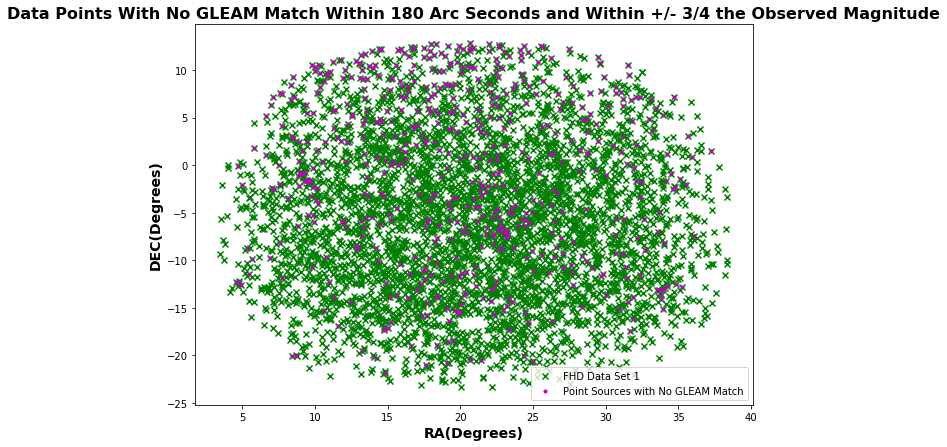

In [162]:
mags = np.array(FHD_table[2]['Mag GLEAM'])
ra = np.array(FHD_table[2]['RA'])
dec = np.array(FHD_table[2]['DEC'])
ra_mtch = []
dec_mtch = []
i_s = np.arange(0, len(mags))
for i in i_s:
    if mags[i] == 0:
        ra_mtch.append(ra[i])
        dec_mtch.append(dec[i])

plt.scatter(ra, dec, marker = 'x', color = 'g', label = 'FHD Data Set 1')
plt.scatter(ra_mtch, dec_mtch, marker = '.', color = 'm', label = 'Point Sources with No GLEAM Match')
plt.xlabel('RA(Degrees)')
plt.ylabel('DEC(Degrees)')
plt.title('Data Points With No GLEAM Match Within 180 Arc Seconds and Within +/- 3/4 the Observed Magnitude')
plt.legend();
print('There were {} sources observed without a GLEAM counterpart.'.format(len(ra_mtch)))

There were 493 sources observed without a GLEAM counterpart. The brightest source was 24.436580658 Jy


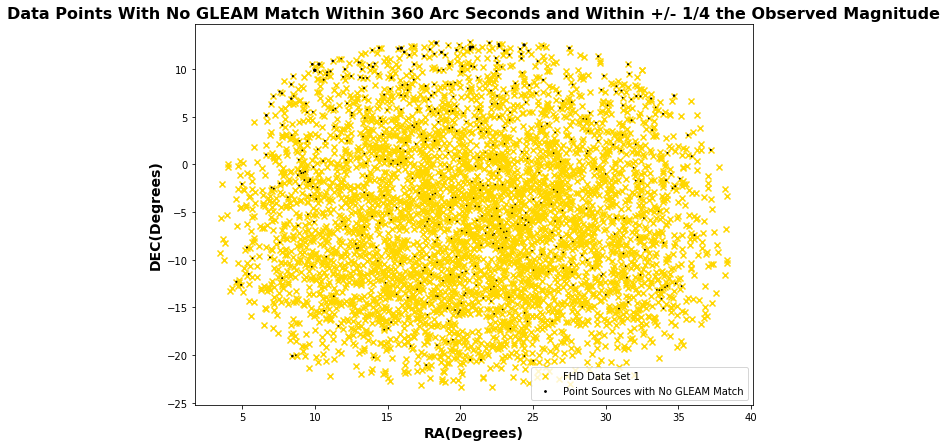

In [173]:
mags = np.array(FHD_table[2]['Mag GLEAM'])
ra = np.array(FHD_table[2]['RA'])
dec = np.array(FHD_table[2]['DEC'])
mags_new = np.array(FHD_table[2]['Mag 3'])
ra_mtch = []
dec_mtch = []
mag_mtch = []
i_s = np.arange(0, len(mags))
for i in i_s:
    if mags[i] == 0:
        ra_mtch.append(ra[i])
        dec_mtch.append(dec[i])
        mag_mtch.append(mags)
plt.scatter(ra, dec, marker = 'x', color = 'gold', label = 'FHD Data Set 1')
plt.scatter(ra_mtch, dec_mtch, marker = '.', color = 'k', label = 'Point Sources with No GLEAM Match', s = mag_mtch)
plt.xlabel('RA(Degrees)')
plt.ylabel('DEC(Degrees)')
plt.title('Data Points With No GLEAM Match Within 360 Arc Seconds and Within +/- 1/4 the Observed Magnitude')
plt.legend();
print('There were {} sources observed without a GLEAM counterpart. The brightest source was {} Jy'.format(len(ra_mtch), np.max(mag_mtch)))